In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.stats.weightstats as ssw
import math
%matplotlib inline

### ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле scipy.stats.

Сгенерируйте примеры из распределения

In [3]:

# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
gennorm_rv = sts.gennorm(5,4)
sample = gennorm_rv.rvs(100)
sample[:10]


array([3.47972897, 3.49739895, 4.0225529 , 4.29578387, 3.85360441,
       3.4906921 , 4.1921652 , 3.32149279, 4.77544456, 4.45279498])

In [4]:
real_mean = gennorm_rv.mean() # настоящее среднее случайной величины
real_mean

4.0

In [5]:
real_var = gennorm_rv.var() # настоящее среднее случайной величины
real_var

0.3243831291665643

Постройте гистограмму выборки и теоретическую плотность распределения


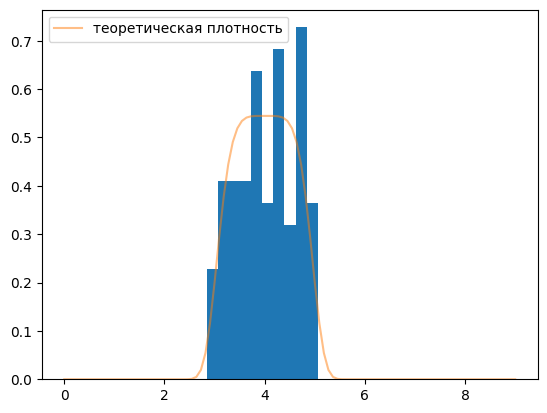

In [6]:
plt.hist(sample, density=True)
x = np.linspace(0,9,100)
pdf = gennorm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [7]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

4.0481009379079635
0.3415936409266624



Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

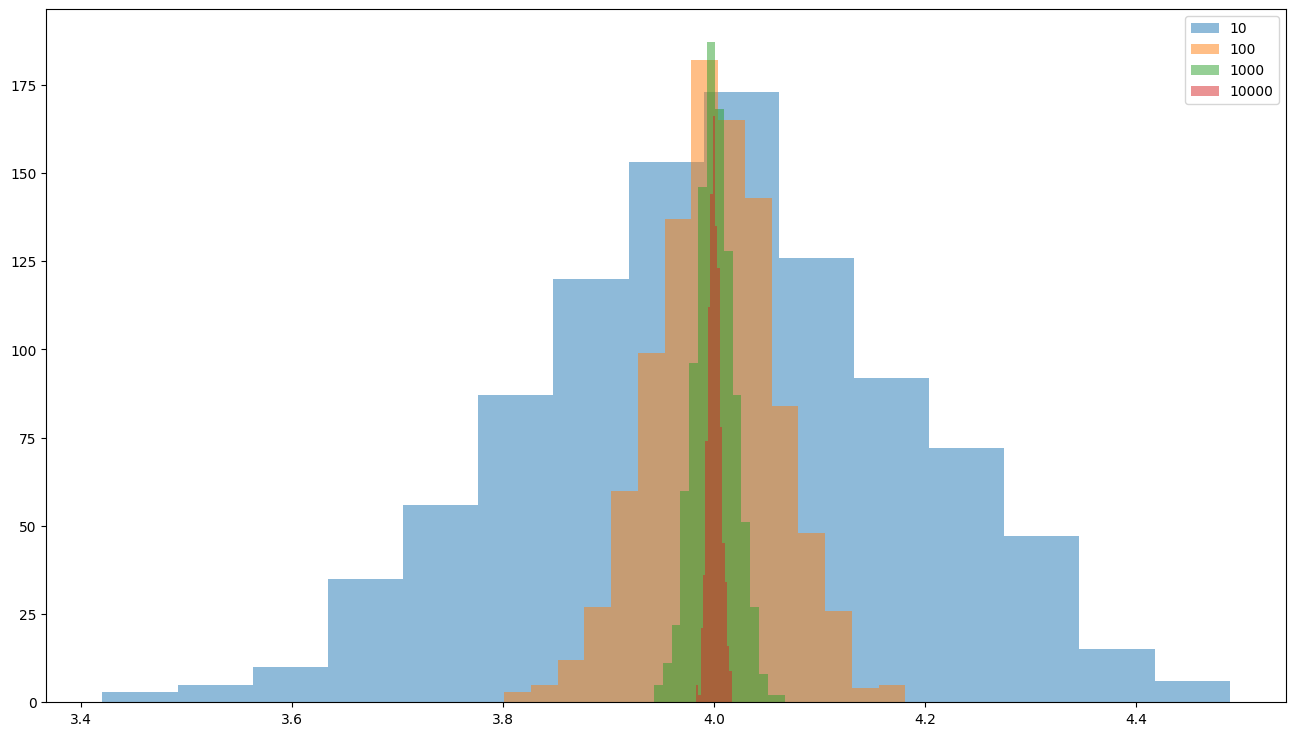

In [8]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(gennorm_rv.rvs(N)))
    plt.hist(means, alpha=0.5, bins=15)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

In [9]:

print(f'mean: {gennorm_rv.mean()}')
print(f'var:  {gennorm_rv.var().round(5)}')
print(f'std:  {gennorm_rv.std().round(5)}')

mean: 4.0
var:  0.32438
std:  0.56955


[]

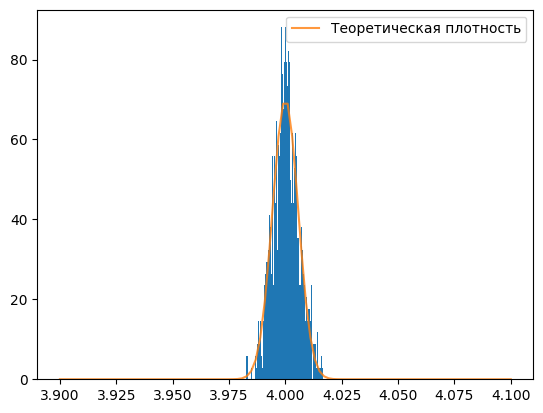

In [10]:
norm_rv = sts.norm(loc=gennorm_rv.mean(), scale=gennorm_rv.std()/ np.sqrt(N))
plt.hist(means, density=True, bins=100)
x = np.linspace(3.9,4.1, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.8)
plt.legend()
plt.plot()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо? Ваш ответ:

Для данного распределения апроксимация выборочного среднего работает хорошо.

### Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций from statsmodels.stats.weightstats import _zconfint_generic. Сравните результаты.

Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [19]:
df=pd.read_csv("/Users/crap/Sber/Data/telecom_churn.csv")
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [20]:
left = df.loc[df['churn'] == True]['total day calls'].tolist()
stay = df.loc[df['churn'] == False]['total day calls'].tolist()

In [28]:
data = stay
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 1.96 * np.sqrt(np.var(data)/len(data)), np.mean(data) + 1.96 * np.sqrt(np.var(data)/len(data)))
)

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.55630252675442, 101.01001326271927] 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.04149114274126, 101.52482464673243) 


In [29]:
data = left
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 1.96 * np.sqrt(np.var(data)/len(data)), np.mean(data) + 1.96 * np.sqrt(np.var(data)/len(data)))
)

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.41262047786196, 103.2581869755542] 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


Доверительный интервал по среднему количеству звонков между ушедшими и оставшимися клиентами отличается не существенно.